In [1]:
import pandas as pd
import numpy as np

# Univariate Outlier Detection

In [28]:
sal = []

for x in range(100):
    num = np.random.randint(20000, 35000)
    sal.append(num)

In [30]:
df = pd.DataFrame({'salary': sal})

In [32]:
df

,salary
0,29576
1,28993
2,21105
3,25746
4,26176
...,...
95,27906
96,30641
97,31825
98,24912


In [41]:
df.iloc[45] = 55000
df.iloc[55] = 45000

### Boxplot

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

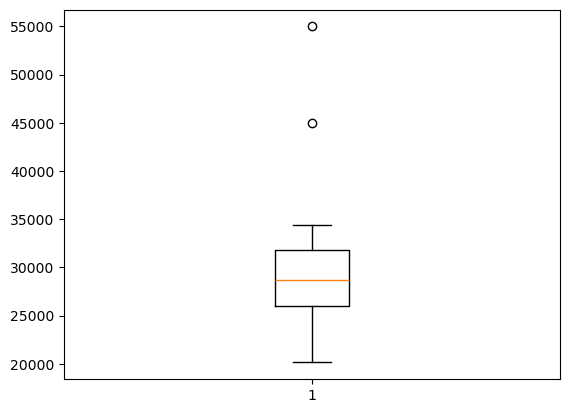

In [46]:
plt.boxplot(df['salary']);

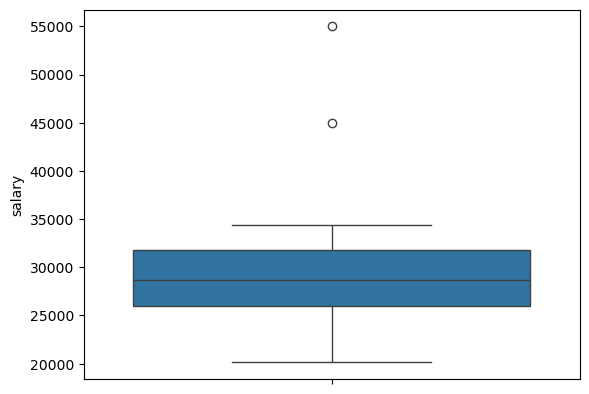

In [48]:
sns.boxplot(df['salary']);

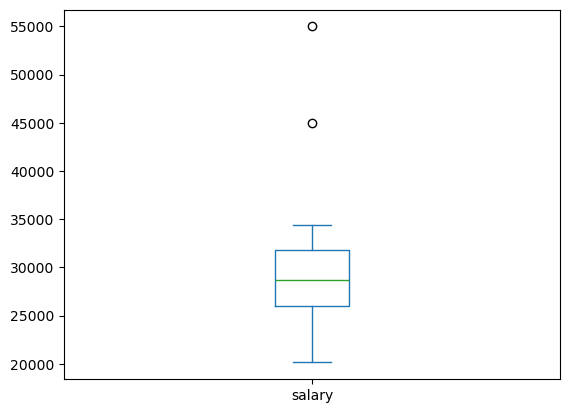

In [52]:
df.plot.box();

### Histogram

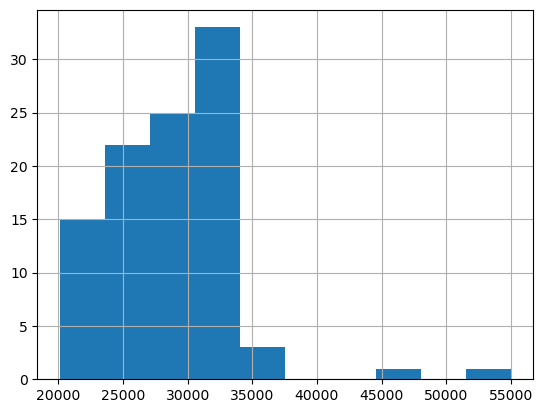

In [57]:
plt.hist(df['salary']);
plt.grid()

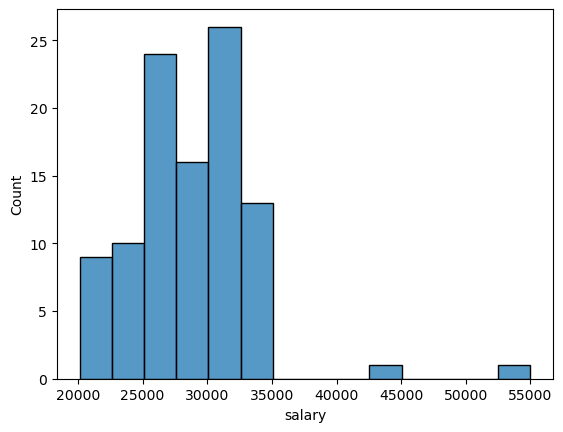

In [59]:
sns.histplot(df['salary']);

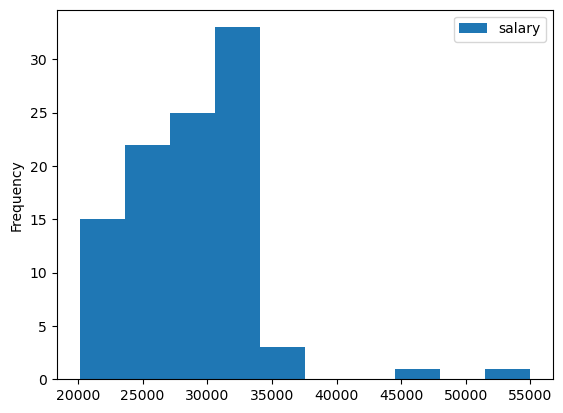

In [63]:
df.plot.hist();

In [65]:
# filter the outliers

In [67]:
new_df = df[df['salary'] < 40000]

In [69]:
new_df.shape

(98, 1)

# Multi-variate Outlier Detection

In [72]:
# Social_Netowrk_Ads.csv

In [100]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [102]:
df.shape

(1372, 5)

In [104]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [106]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [108]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(random_state= 0, contamination= 0.05)
clean = isf.fit_predict(x, y)

In [110]:
clean

array([ 1,  1,  1, ..., -1,  1,  1])

In [112]:
x_clean = x[clean == 1]
y_clean = y[clean == 1]

In [114]:
x_clean.shape

(1303, 4)

In [116]:
y_clean.shape

(1303,)

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean,
                                                   random_state= 0,
                                                   stratify= y_clean)

In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state= 0, n_estimators = 10)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [122]:
y_pred = clf.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9846625766871165